<p dir = 'rtl' style="font-size: 36px;">
ورود کردن کتابخانه ها
</p>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import cv2

warnings.filterwarnings(action = 'ignore' , category = np.ComplexWarning)
warnings.filterwarnings(action = 'ignore' , category = RuntimeWarning)


OUTPUT_SAVE = False
GLOBAL_COUNTER = 0
FONTDICT ={'size': 13, 'font': "Times New Roman"}


<p dir = 'rtl' style="font-size: 36px;">
خواندن عکس و تغییر سایز برای راحتی و کم شدن بار محاسبات
</p>

In [55]:
Stranger_PATH : str = r"C:\Users\AmirHussain\Desktop\Image-processing\Stranger-In_The_Night.jpg"
leviathan_PATH : str = r"C:\Users\AmirHussain\Desktop\Image-processing\leviathan.png"
lenna_PATH : str = r"C:\Users\AmirHussain\Desktop\Image-processing\Lenna_(test_image).png"



leviathan = cv2.imread(leviathan_PATH,cv2.IMREAD_COLOR)
leviathan_gray =  cv2.cvtColor(leviathan, cv2.COLOR_BGR2GRAY)


Stranger = cv2.imread(Stranger_PATH, cv2.IMREAD_COLOR)
Stranger_gray =  cv2.cvtColor(Stranger, cv2.COLOR_BGR2GRAY)

lenna = cv2.imread(lenna_PATH, cv2.IMREAD_COLOR)
lenna_gray =  cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)

Stranger.shape

(1024, 1024, 3)

In [3]:
img = leviathan_gray

In [67]:
def plot(imgs: dict[str , np.ndarray], save_fig=False ,n_row_cols = tuple):
    fontdict = FONTDICT 
    image_name = list(imgs.items())[-1][0]
    # num_imgs = len(imgs)
    # cols = 3 if num_imgs >= 3 else num_imgs
    # rows = ceil(num_imgs / cols)
    rows, cols = n_row_cols
    fig, ax = plt.subplots(rows, cols, figsize=(10, 7))
    ax = ax.flatten() if isinstance(ax, np.ndarray) else [ax]
    
    for indx, (name, img) in enumerate(imgs.items()):
        ax[indx].set_title(name, fontdict=fontdict)
        ax[indx].imshow(img, cmap=  'gray' if img.ndim == 2 else "Accent")
        ax[indx].axis("off")

    # Turn off any unused subplots
    for i in range(indx + 1, len(ax)):
        ax[i].axis("off")

    if save_fig :
        GLOBAL_COUNTER +=1
        plt.savefig(f"{GLOBAL_COUNTER} - {image_name}.png")
    plt.show()


<p dir = 'rtl' style="font-size: 36px;" >
نمایش عکس اصلی
</p>

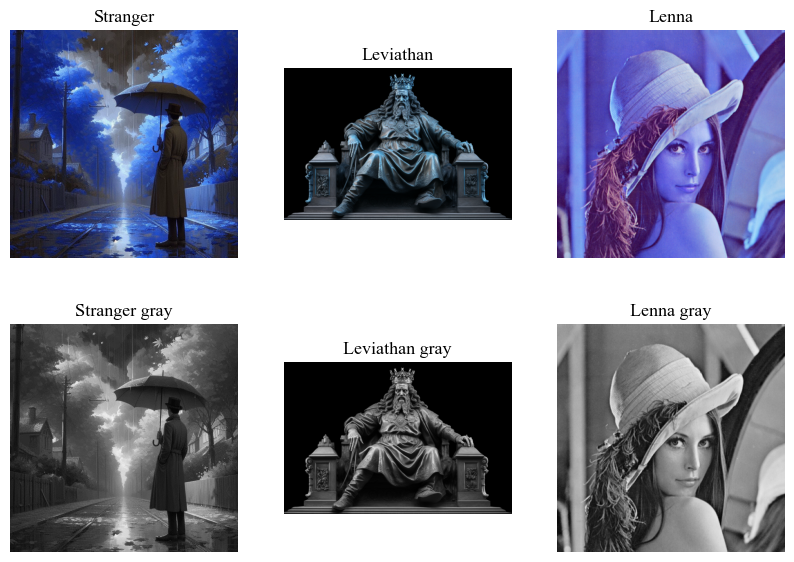

In [69]:
plot(imgs= {
    "Stranger": Stranger,
    "Leviathan": leviathan,
    "Lenna" : lenna,

    "Stranger gray": Stranger_gray,
    "Leviathan gray": leviathan_gray,
    "Lenna gray" : lenna_gray,
    
}, n_row_cols = (2,3))


# Task 1

<p dir = 'rtl' style="font-size: 36px;" >
0 کردن مقادیردیگر کانال ها برای نمایش 
</p>

In [6]:
red_channel = Stranger.copy()
red_channel[:, :, 1] = red_channel[:, :, 2] = 0  # Set green and blue channels to zero

green_channel = Stranger.copy()
green_channel[:, :, 0] = green_channel[:, :, 2] = 0  # Set red and blue channels to zero

blue_channel = Stranger.copy()
blue_channel[:, :, 0] = blue_channel[:, :, 1] = 0  # Set red and green channels to zero

<p dir = 'rtl' style="font-size: 36px; font : 'sans'; " >
نمایش عکس در 3 کانال RGB
</p>

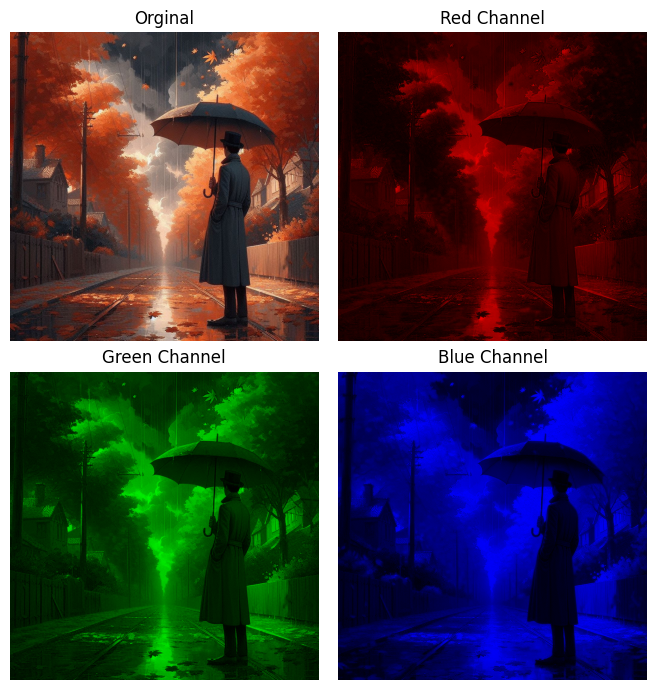

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 7))
# ax[0,0].axis("off")


ax[0,0].set_title('Orginal')
ax[0,0].imshow( cv2.cvtColor(Stranger, cv2.COLOR_BGR2RGB))
ax[0,0].axis("off")

ax[0,1].set_title('Red Channel')
ax[0,1].imshow( red_channel)
ax[0,1].axis("off")

ax[1,0].set_title('Green Channel')
ax[1,0].imshow( green_channel)
ax[1,0].axis("off")

ax[1,1].set_title('Blue Channel')
ax[1,1].imshow( blue_channel )
ax[1,1].axis("off")

plt.tight_layout()


# Adjust the spacing between subplots
plt.subplots_adjust(wspace= -0.8 , hspace=.1)
plt.show()

# Task 2
## fourier Transform


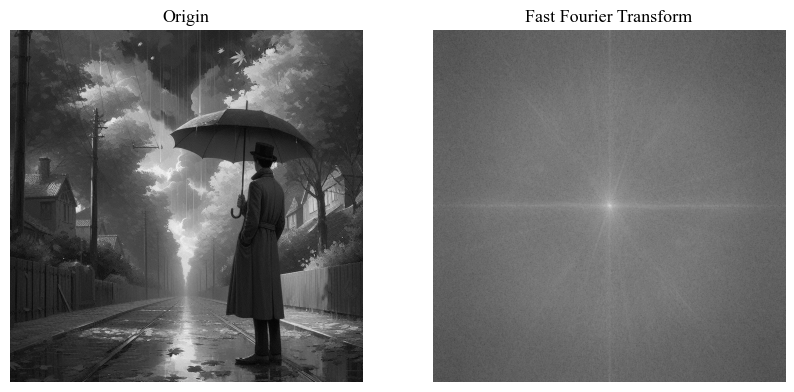

In [32]:
def fourier_transform(image : np.ndarray):
    if image.ndim == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Compute the discrete Fourier Transform of the image
    fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    # Shift the zero-frequency component to the center of the spectrum
    fourier_shift = np.fft.fftshift(fourier)
    # calculate the magnitude of the Fourier Transform
    magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
    # Scale the magnitude for display
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

    return  magnitude

fft = fourier_transform(Stranger_gray)

plot( save_fig = OUTPUT_SAVE , imgs = {"Origin": Stranger_gray ,"Fast Fourier Transform" : fft} , n_row_cols = (1,2))

# Log transform


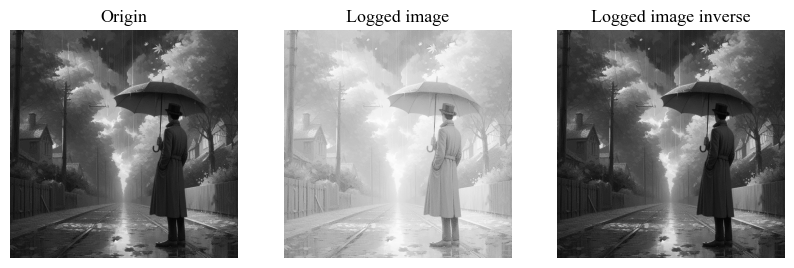

In [33]:
from typing import Literal


def log_transform(image : np.ndarray, 
                  C : Literal['auto'] | float = 'auto'):
    
    if C == "auto":
        C = 255 /np.log10(1 + np.max(image) )
    image_log = np.log10(image+1) * C
    return image_log.astype(np.uint8)



def  inverse_log_transform(log_image: np.ndarray, 
                           C : Literal['auto'] | float = 'auto') -> np.ndarray:
    if C == "auto":
        C = 255 /np.log10(1 + np.max(log_image) )
    else:
        pass
    inverse_log = pow(10, log_image / C) - 1

    return inverse_log.astype(np.uint8)



logged_image = log_transform(Stranger_gray  )
logged_image_inverse = inverse_log_transform(logged_image    )


plot( save_fig = OUTPUT_SAVE , imgs = {"Origin".capitalize() : Stranger_gray ,
       "logged image".capitalize(): logged_image,
       "logged image inverse".capitalize() : logged_image_inverse},
       n_row_cols = (1,3)
       )

# Power ( Gamma ) Filter

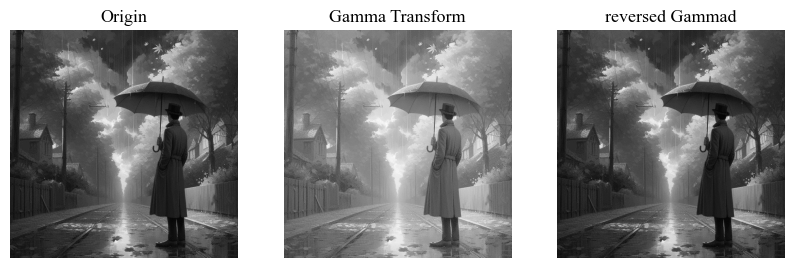

In [34]:
def power(image : np.ndarray, c: float , Gamma : float):
    # c = 255*(image / 255)
    s = c * pow(image, Gamma)
    # s = cv2.normalize(s, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    return s

def depower(image : np.ndarray , c : float , Gamma: float):
    s = c * pow(image, Gamma )
    # s = cv2.normalize(s, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    return s


gamma = .5
rev_gamma = 1 / gamma
c = 10
powr = power(Stranger_gray , c=c , Gamma = gamma )
depowr = depower(powr , c=c  , Gamma= rev_gamma )

plot( save_fig = OUTPUT_SAVE , imgs = 
    {"Origin" : Stranger_gray,
     "Gamma Transform" : powr,
     "reversed Gammad" : depowr}
     , n_row_cols = (1,3)
)

# Histogram Equation

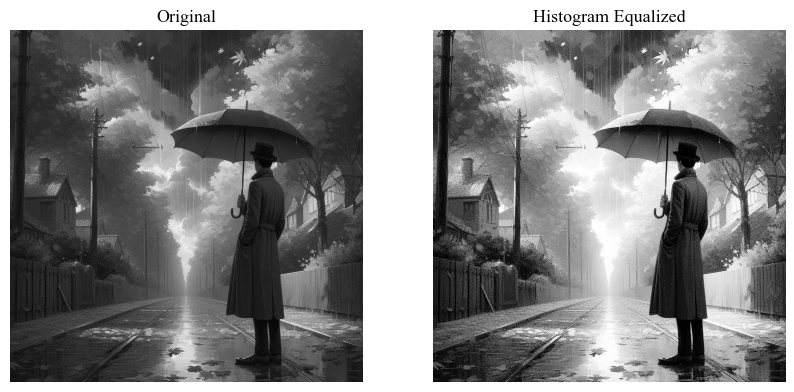

In [35]:
def apply_histogram_equalization(img):
    equalized_img = cv2.equalizeHist(img)
    return equalized_img


equalized_img = apply_histogram_equalization(Stranger_gray)

plot( save_fig = OUTPUT_SAVE ,  imgs = {
    'Original': Stranger_gray,
    'Histogram Equalized': equalized_img
    
}
     , n_row_cols = (1,2)
)

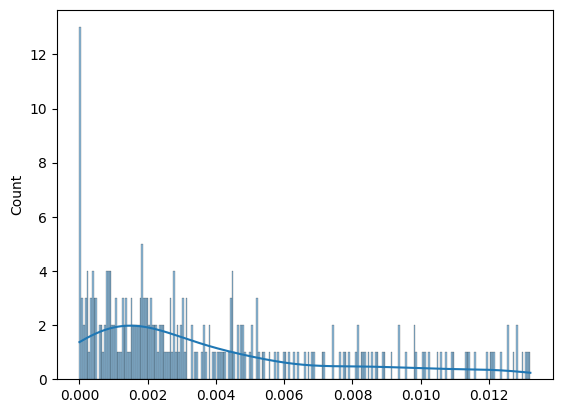

In [12]:
from collections import Counter
import seaborn as sns


def pr(imag ):
    M, N = imag.shape
    MN = M * N
    # Count the number of pixels in each row and column
    count = Counter(imag.reshape(-1))
    count = dict(sorted(count.items() , key= lambda x : x[0]))
    # print(np.sum(list(count.values())))
    P = {}
    for k , v in count.items():
        P[k] = v / MN

    return P

def ps(count : dict ):
    MN = np.sum(list( count.values()))
    # Count the number of pixels in each row and column
    P = {}
    for k , v in count.items():
        P[k] = v / MN

    return P



hist_eq = pr(Stranger_gray)


sns.histplot(hist_eq,bins = 255, kde=True)
plt.axis('on')
plt.show()

In [13]:
def sk(pr : dict ):
    L_1 = 255
    s = pr.copy()
    for k in range(L_1):
        sigma_pj = [j for j in list(pr.values())[:k+1]]
        s[k] = int(L_1 * np.sum(sigma_pj ))
    return s

Sk = sk(hist_eq)


In [14]:
rk_nk = Counter(Stranger_gray.reshape(-1))
rk = list(rk_nk.keys())
nk = list(rk_nk.values())


new_vals = {r : [] for r in rk }

for r, v in rk_nk.items():
    for l, n in Sk.items():
        if n == r :
            new_vals[r].append(l)
        
new_p = {r : 0 for r in rk}
for k,v in new_vals.items():
    for i in v :
        new_p[k] += nk[i]


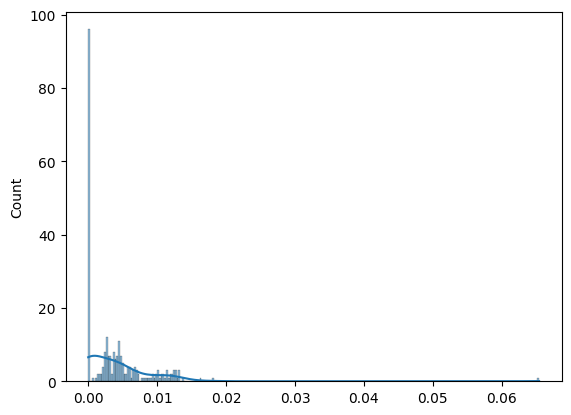

In [15]:
Ps = ps(new_p)

sns.histplot(Ps,bins = 255,  kde=True)
plt.show()

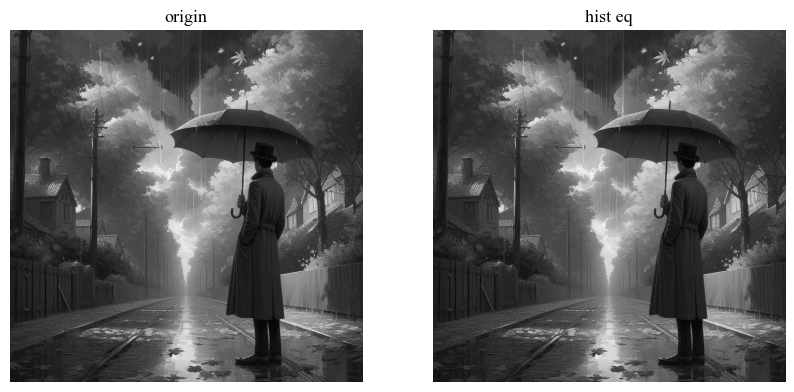

In [36]:
new_img = Stranger_gray.reshape(1024, 1024)

for k, v in Sk.items():
    nws = np.where(new_img == k , v ,new_img ) 


plot( save_fig = OUTPUT_SAVE , imgs = {
    "origin" : Stranger_gray,
    "hist eq" : new_img
    
} , n_row_cols = (1,2))

# Sobel Filter

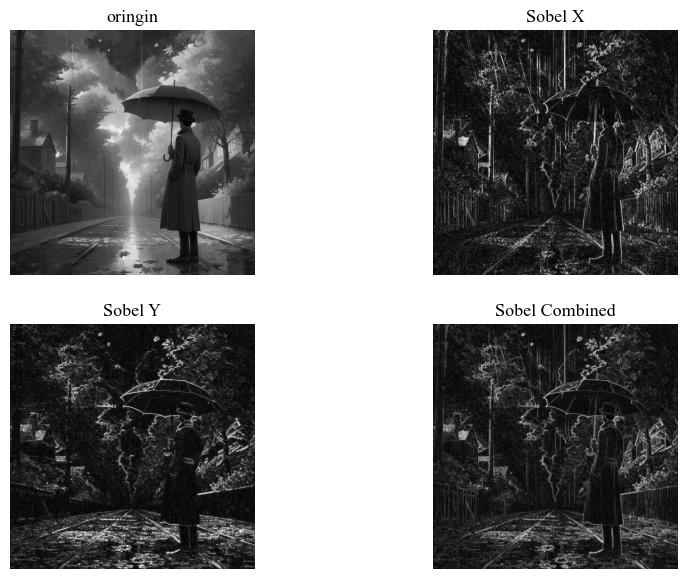

In [37]:

# Apply Sobel filter
sobel_x = cv2.Sobel(Stranger_gray, cv2.CV_64F, 1, 0, ksize=3)  # x-direction
sobel_y = cv2.Sobel(Stranger_gray, cv2.CV_64F, 0, 1, ksize=3)  # y-direction

# Convert to absolute values and then to uint8
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine the two gradients
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display the results
# plt.figure(figsize=(10, 8))
# plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X'),plt.axis('off')
# plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y'),plt.axis('off')
# plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined'),plt.axis('off')

# plt.show()
plot( save_fig = OUTPUT_SAVE , imgs = 
    {
        "oringin" : Stranger_gray,
        "Sobel X": sobel_x,
        "Sobel Y": sobel_y,
        "Sobel Combined": sobel_combined,

    } , n_row_cols = (2,2)
)

# Laplasian

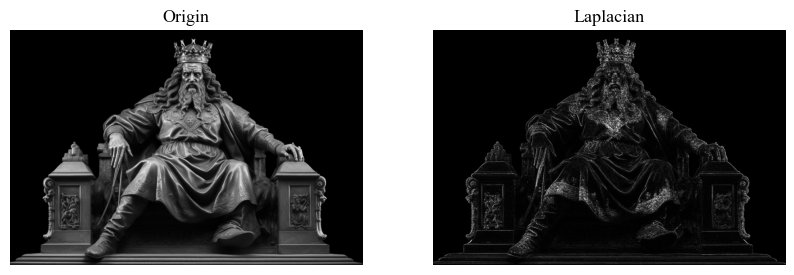

In [38]:

# Apply Laplacian filter
laplacian = cv2.Laplacian(leviathan_gray, cv2.CV_64F )

# Convert to absolute values and then to uint8
laplacian = cv2.convertScaleAbs(laplacian)

# # Display the result
# plt.figure(figsize=(5, 5))
# plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian'),plt.axis('off')
# plt.show()
plot( save_fig = OUTPUT_SAVE , imgs = {
    "Origin" : leviathan_gray,
    'Laplacian': laplacian,

} , n_row_cols = (1,2))

# Gaussian Filter

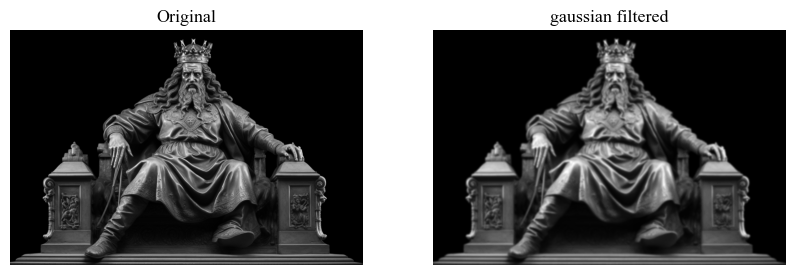

In [39]:
# Gaussian Filter
def gaussian_filter(img, kernel_size=(15, 15), sigma=0):
    return cv2.GaussianBlur(img, kernel_size, sigma)



gaussian_filtered = gaussian_filter(img)

plot( save_fig = OUTPUT_SAVE , imgs = {
    "Original" : img,
    "gaussian filtered" : gaussian_filtered,

} , n_row_cols = (1,2))

# Box Filter

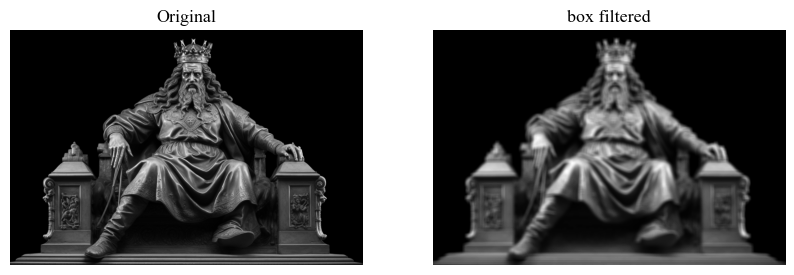

In [40]:
# Box Filter
def box_filter(img, kernel_size=(15, 15)):
    return cv2.blur(img, kernel_size)

box_filtered = box_filter(img)

plot( save_fig = OUTPUT_SAVE , imgs = {
    "Original" : img,
    "box filtered" : box_filtered,

} , n_row_cols = (1,2))

# Median Filter

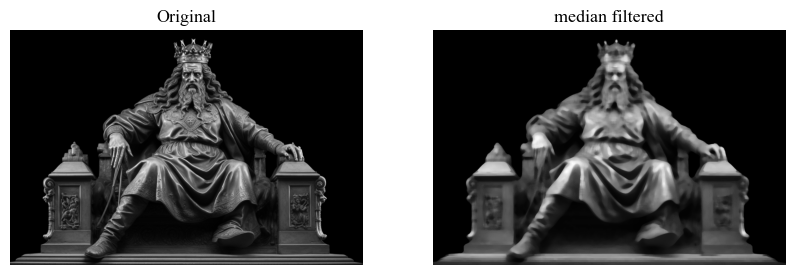

In [41]:
# Median Filter
def median_filter(img, kernel_size=15):
    return cv2.medianBlur(img, kernel_size)

median_filtered = median_filter(img, 15)

plot( save_fig = OUTPUT_SAVE , imgs = {
    "Original" : img,
    "median filtered" : median_filtered,

} , n_row_cols = (1,2))

# Ideal Low Pass Filter

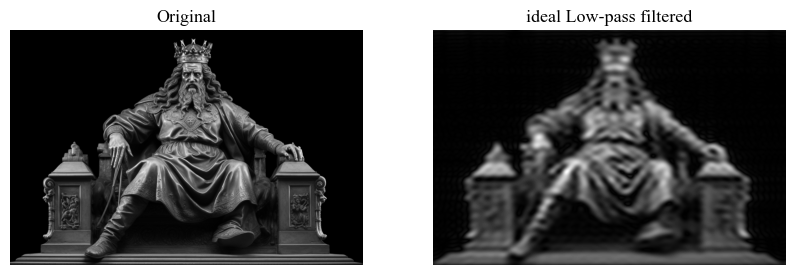

In [42]:
# Ideal Low Pass Filter
def ideal_low_pass(img, cutoff):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-cutoff:crow+cutoff, ccol-cutoff:ccol+cutoff] = 1
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    return img_back


ideal_lp_filtered = ideal_low_pass(img, 30)

plot( save_fig = OUTPUT_SAVE , imgs = {
    "Original" : img,
    "ideal Low-pass filtered" : ideal_lp_filtered,

} , n_row_cols = (1,2))

# Butterworth Low Pass Filter

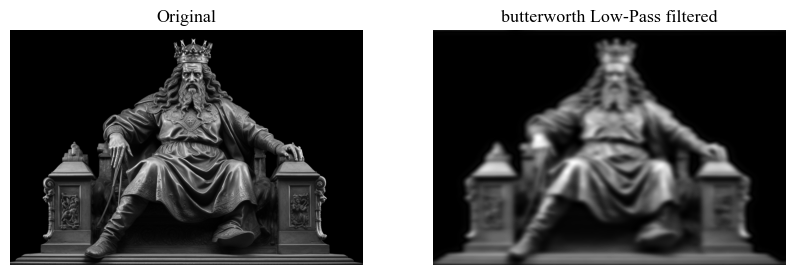

In [43]:
# Butterworth Low Pass Filter
def butterworth_low_pass(img, cutoff, order):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (distance / cutoff) ** (2 * order))
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    return img_back


butterworth_lp_filtered = butterworth_low_pass(img, 30, 2)

plot( save_fig = OUTPUT_SAVE , imgs = {
    "Original" : img,
    "butterworth Low-Pass filtered" : butterworth_lp_filtered,

} , n_row_cols = (1,2))

# Gaussian Low Pass Filter

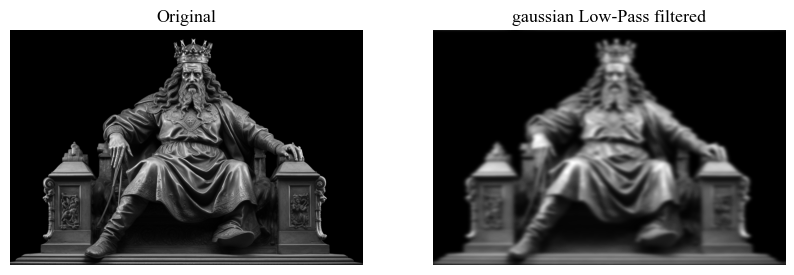

In [44]:
# Gaussian Low Pass Filter
def gaussian_low_pass(img, cutoff):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    return img_back


gaussian_lp_filtered = gaussian_low_pass(img, 30)
plot( save_fig = OUTPUT_SAVE , imgs = {
    "Original" : img,
    "gaussian Low-Pass filtered" : gaussian_lp_filtered,

} , n_row_cols = (1,2))